# Word embeddings

**Information**


*** 
**Background information**



***
**Coding sources**

* 


***
**Aim of the code template**

Provide an example for a model call, which produces deterministic results.

## Get API key(s)

In [1]:
import os
import sys

# Assuming 'src' is one level down (in the current directory or a subdirectory)
path_to_src = os.path.join('src')  # Moves one level down to 'src' folder

# Add the path to sys.path
sys.path.append(path_to_src)

# Now you can import your API_key module
import API_key as key

# load local embedding model

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(
    'dunzhang/stella_en_400M_v5',
    trust_remote_code=True,
    config_kwargs={"use_memory_efficient_attention": False, "unpad_inputs": False}
)

/home/fenn/Documents/env_python/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
Some weights of the model checkpoint at dunzhang/stella_en_400M_v5 were not used when initializing NewModel: ['new.pooler.dense.bias', 'new.pooler.dense.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


nice printing:

In [3]:
from rich import print

# Extract word embeddings

## Feature Extraction with `sentence_transformers`

The following begins by extracting features (embeddings) from the text data---numerical representations of the meaning of text---using the `sentence_transformers` package.

The code makes use of the `dunzhang/stella_en_400M_v5` model, which is a larger embedding model, to extract features from the sentences. The model will encode the sentences into 1024-dimensional vector representations. The cell will then print the features as a pandas dataframe for easy viewing. See model page: https://huggingface.co/Marqo/dunzhang-stella_en_400M_v5

In [4]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Define sentences
sentences = [
    "I feel great this morning",
    "I am feeling very good today",
    "I am feeling terrible"
]

# Extract features
features = model.encode(sentences)

# Print the features as a pandas dataframe
pd.DataFrame(features, index=sentences)

/home/fenn/Documents/env_python/lib/python3.12/site-packages/transformers/modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
I feel great this morning,-0.273803,-0.263797,-1.662458,0.123033,-0.756290,0.698615,0.110668,-0.128599,-0.636786,-0.075833,...,0.887946,0.141224,-0.110844,0.754704,0.382694,-0.798626,-1.105588,-0.203037,-0.535024,-0.980099
I am feeling very good today,0.145963,-0.259172,-1.851646,0.306638,-0.757653,1.123267,0.027637,-0.479936,-0.392065,0.005086,...,0.904707,0.249545,0.067650,0.631296,-0.114174,-0.632552,-0.874013,-0.040664,-0.033335,-0.471507
I am feeling terrible,-0.313051,-0.363651,-1.008055,0.305495,-1.265285,-0.477211,-0.000079,-0.031176,-0.245443,0.308194,...,1.407357,0.985921,0.167890,0.614477,0.505929,-0.919984,-1.523541,0.141674,0.173089,-0.657564


In [5]:
features.shape

(3, 1024)

In [6]:
similarities = model.similarity(features, features)
print(similarities)

tensor([[1.0000, 0.8755, 0.6394],
        [0.8755, 1.0000, 0.6769],
        [0.6394, 0.6769, 1.0000]])

# For every single unique word compute embeddings

In [7]:
import pandas as pd
import os

# Define the absolute file path based on the current working directory
cwd = os.getcwd()
file_path = os.path.join(cwd, '..', '01_dataPreperation/outputs', 'edgelistAssociations.xlsx')  # Adjust path as needed

# Read the Excel file into a pandas DataFrame
try:
    df = pd.read_excel(file_path, engine='openpyxl')  # Use openpyxl for .xlsx files
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


In [8]:
df

,ID,sustainable,bioinspired,timestampSec,rational
0,1,Windräder,Flugzeuge,16.09,ich sehe die verbindung durch das ähnliche des...
1,1,Kleidung aus recyceltem Plastik,Taucherflossen,21.49,Taucherflossen können bestimmt auch aus recycl...
2,3,Minimalistisch,Auch minimalistische Eigenschaften,3.44,"Die erste Assoziation, die mir zu nachhaltiger..."
3,3,Design,Auch minimalistische Eigenschaften,6.33,Ein minimalistisches Design halte ich für über...
4,3,Design,Holz,8.68,Holz sehe ich als mögliches Designelement von ...
...,...,...,...,...,...
176,58,Wartbare Produkte,Hubschrauber,82.69,Hubschrauber müssen nicht komplett ausgetausch...
177,59,Wasserkraftwerk,Wasserpumpe,10.92,Weil wahrscheinlich in einem Wasserkraftwerk W...
178,59,Solarenergie,Solarenergie-Anlagen,16.39,Solarenergie wird mit einer Solarenergie-Anlag...
179,59,Elektroauto,Solarenergie-Anlagen,25.14,Der Strom für das Auto kommt von der Solarener...


# similarity between connected associations

In [9]:
import pandas as pd

# Assuming df is already loaded and 'model' is your sentence embedding model (like SentenceTransformer)

# Create embeddings for each pair
sustainable_embeddings = model.encode(df['sustainable'].tolist())
bioinspired_embeddings = model.encode(df['bioinspired'].tolist())

# Compute cosine similarity for each pair
similarities = [model.similarity(s_emb, b_emb) for s_emb, b_emb in zip(sustainable_embeddings, bioinspired_embeddings)]

# Add the similarity scores as a new column in the original dataframe (filtered version)
df['similarity'] = similarities
df['similarity'] = df['similarity'].apply(lambda x: float(x[0].item()))

/home/fenn/Documents/env_python/lib/python3.12/site-packages/transformers/modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [10]:
df

,ID,sustainable,bioinspired,timestampSec,rational,similarity
0,1,Windräder,Flugzeuge,16.09,ich sehe die verbindung durch das ähnliche des...,0.542601
1,1,Kleidung aus recyceltem Plastik,Taucherflossen,21.49,Taucherflossen können bestimmt auch aus recycl...,0.539335
2,3,Minimalistisch,Auch minimalistische Eigenschaften,3.44,"Die erste Assoziation, die mir zu nachhaltiger...",0.893186
3,3,Design,Auch minimalistische Eigenschaften,6.33,Ein minimalistisches Design halte ich für über...,0.521404
4,3,Design,Holz,8.68,Holz sehe ich als mögliches Designelement von ...,0.542741
...,...,...,...,...,...,...
176,58,Wartbare Produkte,Hubschrauber,82.69,Hubschrauber müssen nicht komplett ausgetausch...,0.569996
177,59,Wasserkraftwerk,Wasserpumpe,10.92,Weil wahrscheinlich in einem Wasserkraftwerk W...,0.859439
178,59,Solarenergie,Solarenergie-Anlagen,16.39,Solarenergie wird mit einer Solarenergie-Anlag...,0.962657
179,59,Elektroauto,Solarenergie-Anlagen,25.14,Der Strom für das Auto kommt von der Solarener...,0.552109


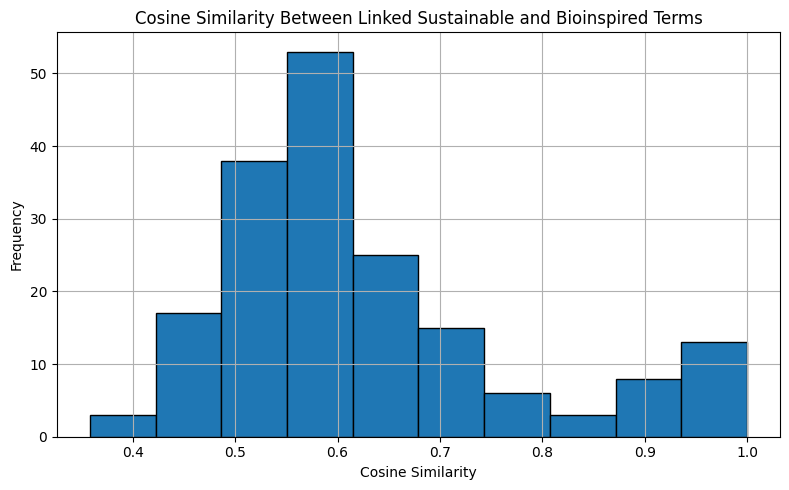

In [11]:
import matplotlib.pyplot as plt

# Plot histogram of cosine similarity values
plt.figure(figsize=(8, 5))
plt.hist(df['similarity'], bins=10, edgecolor='black')

plt.title('Cosine Similarity Between Linked Sustainable and Bioinspired Terms')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
